# NU Day Demo
# 28.09.2024
# Askhat Aubakirov, coordinator of Makerspace Petropavl

# Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# INPUT

In [53]:
#DO NOT RUN
#input_data = pd.read_csv('input.csv')

In [54]:
input_data = {'hours': [22,30,40,40,33,10],
              'gpa': [2.8,3.2,3.9,3.5,3.7,1.8]}

input_data = pd.DataFrame(input_data)

In [55]:
input_data.head(10)

,hours,gpa
0,22,2.8
1,30,3.2
2,40,3.9
3,40,3.5
4,33,3.7
5,10,1.8


# Exploratory Data Analysis

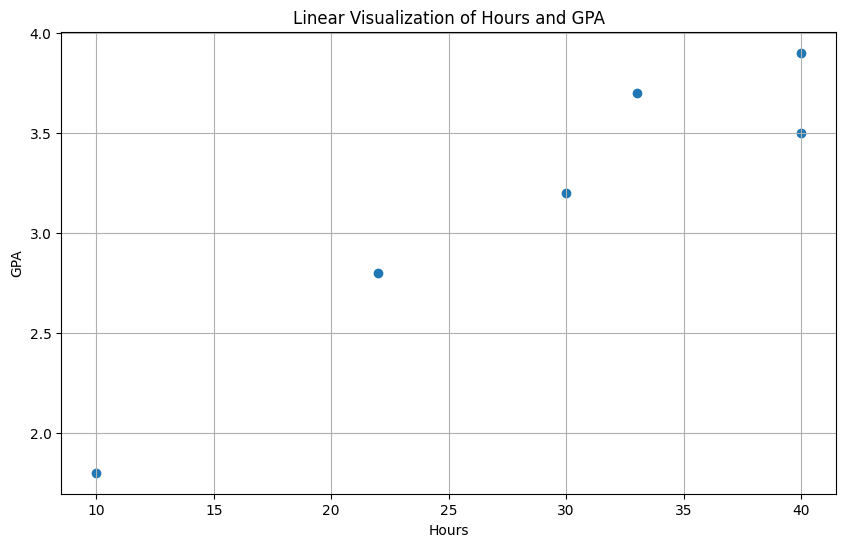

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(input_data['hours'], input_data['gpa'])
plt.xlabel('Hours')
plt.ylabel('GPA')
plt.title('Linear Visualization of Hours and GPA')
plt.grid(True)
plt.show()

# Creating a math model + matrices

This is Linear Pattern, so let's model it as a linear model.

It would look smth like this:

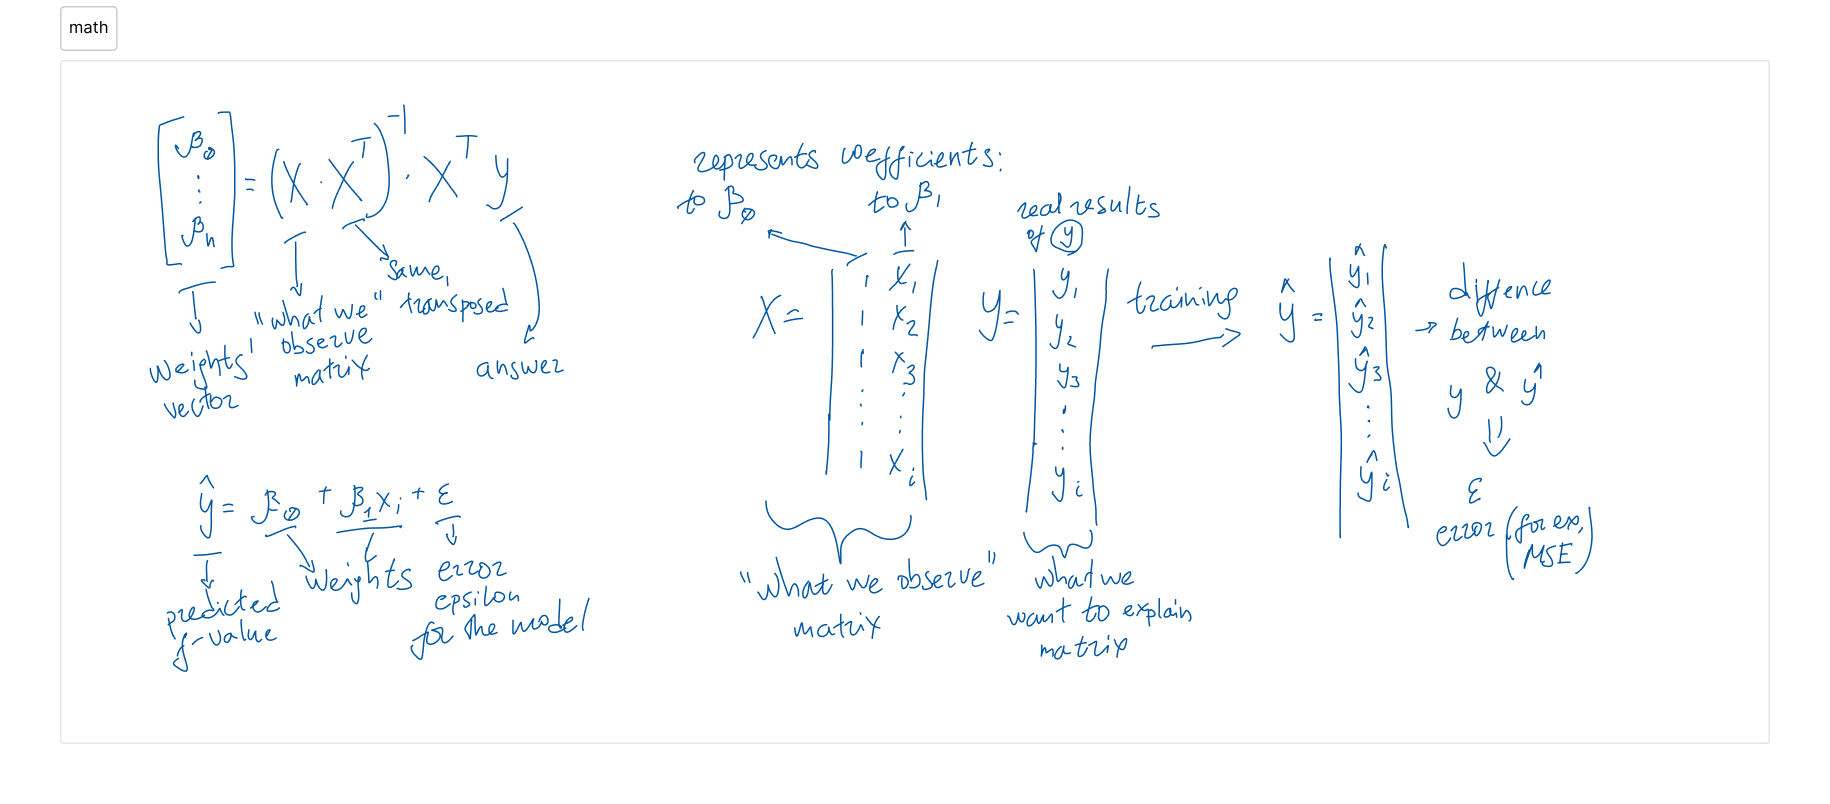


In [57]:
X_data = pd.DataFrame({'ones': np.ones(len(input_data)), 'hours': input_data['hours']})

In [58]:
X_data.head(10)

,ones,hours
0,1.0,22
1,1.0,30
2,1.0,40
3,1.0,40
4,1.0,33
5,1.0,10


In [59]:
y_data = input_data[['gpa']]

In [60]:
y_data.head(10)

,gpa
0,2.8
1,3.2
2,3.9
3,3.5
4,3.7
5,1.8


# Implementing the Least Squares Method

In [61]:
def least_squares(X_data, y_data):
  """
  Implements the Least Squares Method to calculate regression coefficients.

  Args:
    X_data: A pandas DataFrame containing the independent variables.
    y_data: A pandas Series or DataFrame containing the dependent variable.

  Returns:
    A numpy array containing the regression coefficients.
  """

  # Convert data to numpy arrays
  X = X_data.values
  y = y_data.values

  # Calculate the coefficients using the least squares formula
  beta = np.linalg.inv(X.T @ X) @ X.T @ y

  return beta

In [62]:
coef = least_squares(X_data, y_data)

In [63]:
print(coef)

[[1.29882881]
 [0.06346873]]


In [64]:
# prompt: give me code to calculate y_predicted by user input of x (hours) using beta coefficients in y = B_0 + B_1*x_i

def predict_y(x, coef):
  """
  Predicts the dependent variable (y) using the regression coefficients (coef) and a given independent variable (x).

  Args:
    x: The value of the independent variable (hours).
    coef: The regression coefficients (beta).

  Returns:
    The predicted value of the dependent variable (y).
  """

  y_predicted = coef[0] + coef[1] * x
  return y_predicted

In [65]:
y_predicted = predict_y(X_data['hours'], coef)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_data['gpa'] - y_predicted) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.04012542569980893
Root Mean Squared Error (RMSE): 0.2003133188278027


# Testing Random User Input

In [66]:
user_input_hours = float(input("Enter the number of hours studied: "))
predicted_gpa = predict_y(user_input_hours, coef)
print("Predicted gpa:", predicted_gpa)

Predicted gpa: [3.39329679]
